<a href="https://colab.research.google.com/github/jadhaoanshul/Deep-Learning/blob/main/A21_ANN_Practical5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DL Practical 5
#### Name : Anshul Jadhao<br> Batch : A2<br> Roll No. : 21
#### Aim : Design and develop an Artificial Neural Network model using  below conditions for diabetes prediction. Apply regularization technique like L1, L2, dropout and early stopping to improve the performance of the model.Experiment with individual or combination of regularization techniques.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFuncti

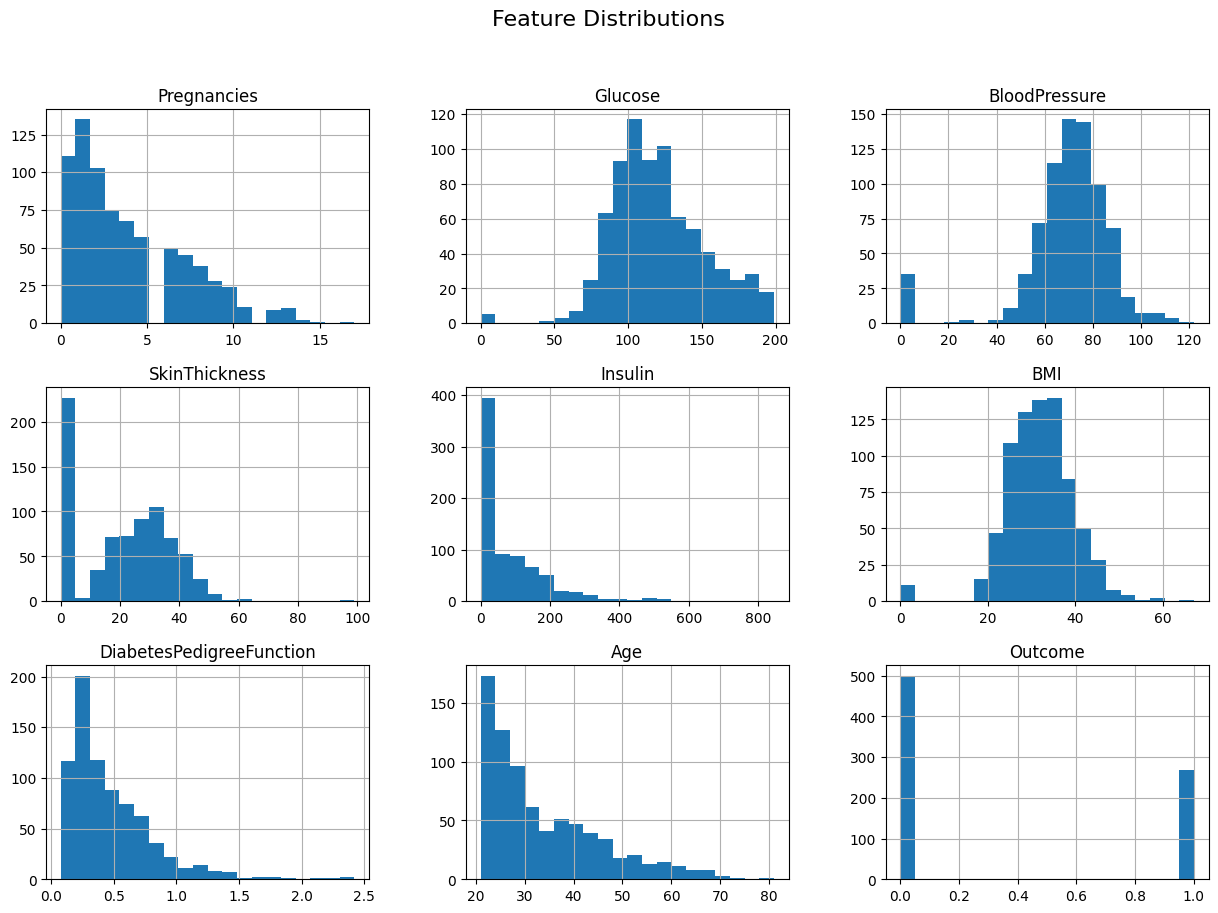

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Study Material/SEM-6/DL/Practical5/diabetes (1).csv')
print("Dataset Information:")
df.info()
# 2. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Display statistical summary
print("\nStatistical Summary:")
print(df.describe())

# 4. Visualize the distribution of each feature
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# # 6. Visualize class balance for the target variable
# sns.countplot(x='Outcome', data=df)
# plt.title('Class Distribution of Outcome')
# plt.show()

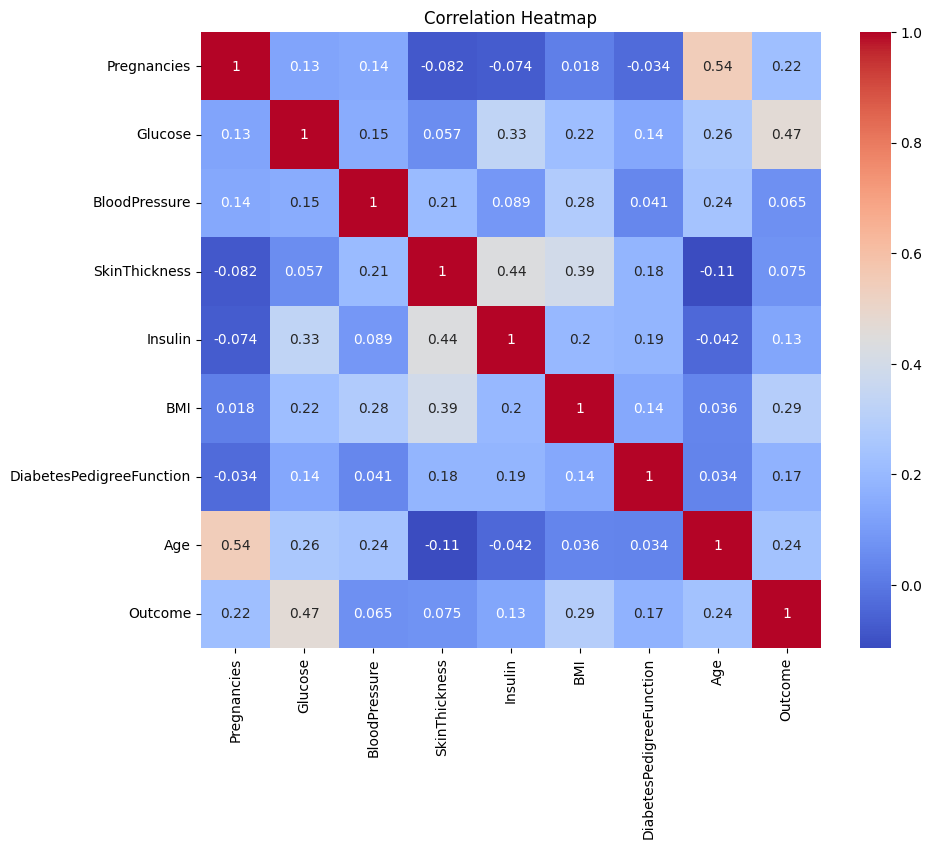

In [6]:
#Without regularization
# 5. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#2. Train and evaluate the performance of model using appropriate metrics.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace zeros with NaN for relevant columns
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

# Impute missing values using the median of each column
df.fillna(df.median(), inplace=True)

# Split the dataset into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the data
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5185 - loss: 0.7034 - val_accuracy: 0.6039 - val_loss: 0.6690
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6080 - loss: 0.6588 - val_accuracy: 0.6753 - val_loss: 0.6368
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6732 - loss: 0.6203 - val_accuracy: 0.7143 - val_loss: 0.6144
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6969 - loss: 0.6030 - val_accuracy: 0.7078 - val_loss: 0.5956
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7158 - loss: 0.5720 - val_accuracy: 0.7143 - val_loss: 0.5781
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7259 - loss: 0.5569 - val_accuracy: 0.7208 - val_loss: 0.5634
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7375 - loss: 0.5354 - val_accuracy: 0.7338 - val_loss: 0.5504
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7243 - loss: 0.5328 - val_accuracy: 0.7468 - val_loss: 0.

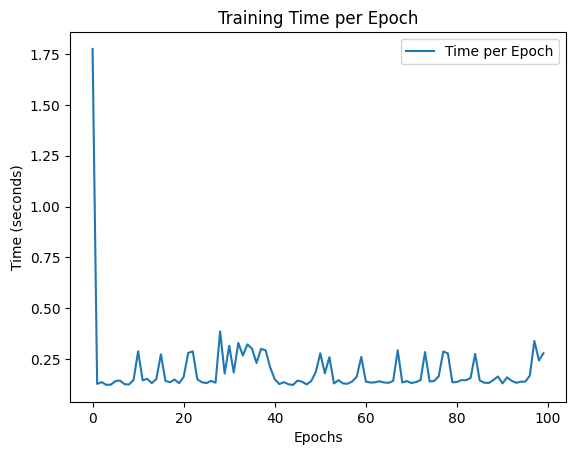

In [9]:
import time
import tensorflow as tf #Importing the tensorflow module
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential #Importing sequential
from tensorflow.keras.layers import Dense #Importing Dense

# Custom callback to track runtime per epoch
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_start_time)

# Initialize the callback
time_callback = TimeHistory()
# Rebuild the model (if running this separately)
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the time tracking callback
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
                    verbose=1, callbacks=[time_callback])
# Plot runtime per epoch
plt.plot(time_callback.times, label='Time per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.title('Training Time per Epoch')
plt.legend()
plt.show()

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6486 - loss: 2.2836 - val_accuracy: 0.6039 - val_loss: 2.2085
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6320 - loss: 2.1107 - val_accuracy: 0.6104 - val_loss: 2.0587
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6681 - loss: 1.9645 - val_accuracy: 0.6104 - val_loss: 1.9250
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6671 - loss: 1.8500 - val_accuracy: 0.6039 - val_loss: 1.8048
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6464 - loss: 1.7325 - val_accuracy: 0.6234 - val_loss: 1.6970
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6575 - loss: 1.6266 - val_accuracy: 0.6169 - val_loss: 1.5980
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6769 - loss: 1.5232 - val_accuracy: 0.6429 - val_loss: 1.5084
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6597 - loss: 1.4413 - val_accuracy: 0.6429 

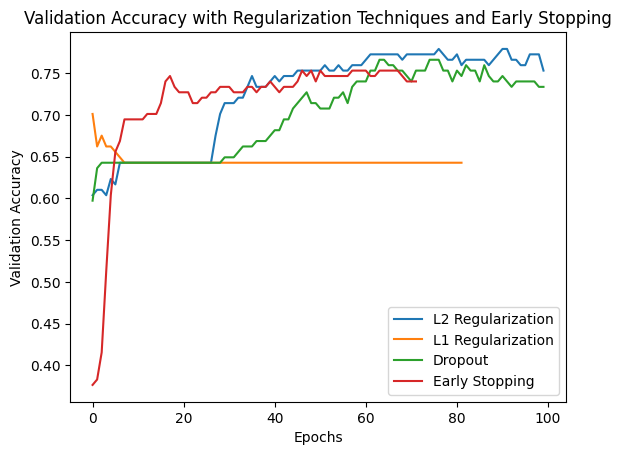

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Dense: Fully connected layer for neurons in the neural network.
# Dropout: Regularization layer to randomly set a fraction of input units to 0 during training, preventing overfitting.
# l1, l2: L1 and L2 regularization to add penalty terms to the loss function, reducing overfitting by constraining weights.

# EarlyStopping: Stops training early if no improvement in validation loss is observed for a specified number of epochs.
callback = EarlyStopping(monitor="val_loss", min_delta=0.00001, patience=20,
                         verbose=1, mode="auto", baseline=None, restore_best_weights=True)

### 1. Model with L2 Regularization ###
model_l2 = Sequential()
model_l2.add(Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.1)))
model_l2.add(Dense(8, activation='relu', kernel_regularizer=l2(0.1)))
model_l2.add(Dense(1, activation='sigmoid'))

model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
                          callbacks=[callback], verbose=1)

### 2. Model with L1 Regularization ###
model_l1 = Sequential()
model_l1.add(Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l1(0.1)))
model_l1.add(Dense(8, activation='relu', kernel_regularizer=l1(0.1)))
model_l1.add(Dense(1, activation='sigmoid'))

model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_l1 = model_l1.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
                          callbacks=[callback], verbose=1)

### 3. Model with Dropout ###
model_dropout = Sequential()
model_dropout.add(Dense(8 , activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dropout.add(Dropout(0.4))
model_dropout.add(Dense(8, activation='relu'))
model_dropout.add(Dropout(0.4))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
                                    callbacks=[callback], verbose=1)

### 4. Model with Early Stopping ###
model_early_stopping = Sequential()
model_early_stopping.add(Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_early_stopping.add(Dense(8, activation='relu'))
model_early_stopping.add(Dense(1, activation='sigmoid'))

model_early_stopping.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_early_stopping = model_early_stopping.fit(X_train_scaled, y_train, epochs=100,
                                                  validation_data=(X_test_scaled, y_test),
                                                  callbacks=[callback], verbose=1)

### Plot Validation Accuracy ###
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization')
plt.plot(history_l1.history['val_accuracy'], label='L1 Regularization')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.plot(history_early_stopping.history['val_accuracy'], label='Early Stopping')
plt.title('Validation Accuracy with Regularization Techniques and Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


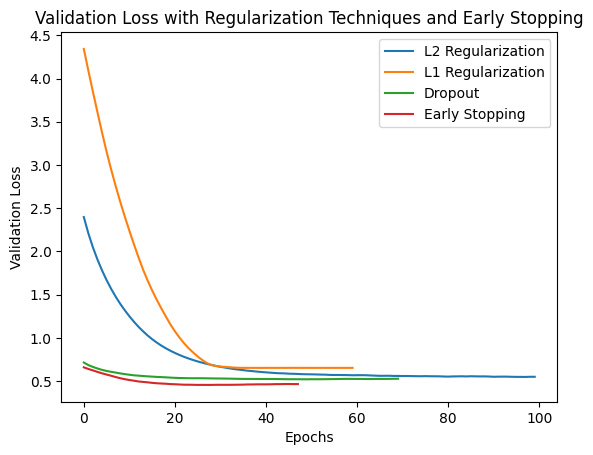

In [16]:
### Plot Validation Loss ###
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.plot(history_l1.history['val_loss'], label='L1 Regularization')
plt.plot(history_dropout.history['val_loss'], label='Dropout')
plt.plot(history_early_stopping.history['val_loss'], label='Early Stopping')
plt.title('Validation Loss with Regularization Techniques and Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6247 - loss: 0.6881 - val_accuracy: 0.6429 - val_loss: 0.6693
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6041 - loss: 0.6888 - val_accuracy: 0.6753 - val_loss: 0.6469
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6174 - loss: 0.6569 - val_accuracy: 0.6688 - val_loss: 0.6282
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6090 - loss: 0.6529 - val_accuracy: 0.6883 - val_loss: 0.6120
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6431 - loss: 0.6221 - val_accuracy: 0.6948 - val_loss: 0.5969
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6840 - loss: 0.5895 - val_accuracy: 0.7078 - val_loss: 0.5805
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6731 - loss: 0.5783 - val_accuracy: 0.7078 - val_loss: 0.5664
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6874 - loss: 0.5614 - val_accuracy: 0.7273 - 

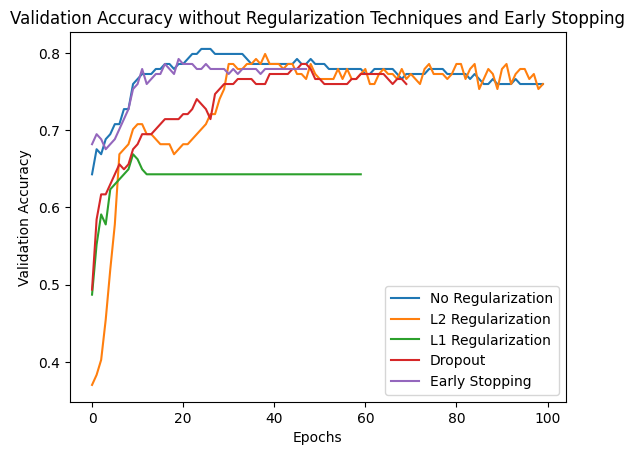

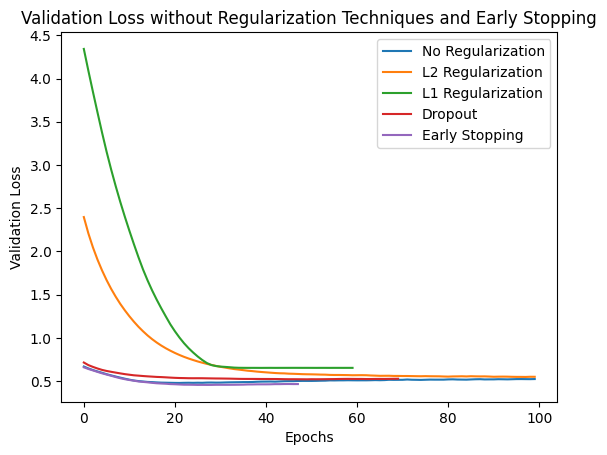

In [20]:
### Baseline Model Without Any Regularization ###
model_baseline = Sequential()
model_baseline.add(Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_baseline.add(Dense(8, activation='relu'))
model_baseline.add(Dense(1, activation='sigmoid'))

model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_baseline = model_baseline.fit(X_train_scaled, y_train, epochs=100,
                                      validation_data=(X_test_scaled, y_test),
                                      verbose=1)

### Plot Validation Accuracy (Including Baseline) ###
plt.plot(history_baseline.history['val_accuracy'], label='No Regularization')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization')
plt.plot(history_l1.history['val_accuracy'], label='L1 Regularization')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.plot(history_early_stopping.history['val_accuracy'], label='Early Stopping')
plt.title('Validation Accuracy without Regularization Techniques and Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Plot Validation Loss (Including Baseline) ###
plt.plot(history_baseline.history['val_loss'], label='No Regularization')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.plot(history_l1.history['val_loss'], label='L1 Regularization')
plt.plot(history_dropout.history['val_loss'], label='Dropout')
plt.plot(history_early_stopping.history['val_loss'], label='Early Stopping')
plt.title('Validation Loss without Regularization Techniques and Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Save the trained model
model_l1_l2_dropout.save('best_model.h5')